In [1]:
import matplotlib.pyplot as plt
import numpy as np
import regression_code as reg
import read_data as read
import matplotlib.patches as mpatches
from matplotlib.patches import ConnectionPatch
import math
import plotTrack as plot

E:\Anaconda\envs\trajectory\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Read File and prepare the data ready for Training

In [2]:
path = 'samples/'
Filename = ['mid-1_uni_PR10_PO10_F5_R10.hdf5',
            'mid0_uni_PR10_PO10_F5_R10.hdf5',
            'mid+1_uni_PR10_PO10_F5_R10.hdf5',
            'mid+05_uni_PR10_PO10_F5_R10.hdf5',
            'mid-05_uni_PR10_PO10_F5_R10.hdf5']

In [3]:
dataMat_org, dataMat_x_org, dataMat_y_org = read.read_hdf5_auto(path, Filename)

In [23]:
dataMat_org[:5,:]

matrix([[102.96894786, 103.31497935,   0.        ,   0.        ,
          16.82906723,  20.97123265],
        [122.76696294, 127.60119136,  19.79801508,  24.286212  ,
         -34.17105436, -10.6585306 ],
        [108.39392366, 141.22887276, -14.37303928,  13.62768141,
          33.82882405,   6.71170615],
        [127.84970843, 161.56826032,  19.45578477,  20.33938756,
         -12.17129754,  -6.9180571 ],
        [135.13419566, 174.98959077,   7.28448723,  13.42133045,
          15.82858087,  14.45217965]])

## Trainging with regression methods

In [4]:
#### build the Regressino Tree for accX and accY
regTreeX_trained = reg.createTree(dataMat_x_org, stopCond=(0,10))
regTreeY_trained = reg.createTree(dataMat_y_org, stopCond=(0,10))

#### evaluate the Regressino Tree
accArr_x = reg.createForeCast(regTreeX_trained, dataMat_x_org[:,:-1])    #  dataMat_x[:,:-1]: transfer all feature data, Except the acceleration !
print("\ncorrelation coefficients (accX, regTree): ", np.corrcoef(accArr_x, dataMat_x_org[:,-1], rowvar=0)[0,1])    #  dataMat_x[:,-1]: transfer the acceleration !
print("\nSquared error (accX, regTree): ", reg.calError(dataMat_x_org[:,-1].flatten().A[0], accArr_x))

accArr_Y = reg.createForeCast(regTreeY_trained, dataMat_y_org[:,:-1])  
print("\ncorrelation coefficients (accY, regTree): ", np.corrcoef(accArr_Y, dataMat_y_org[:,-1], rowvar=0)[0,1])
print("\nSquared error (accY, regTree): ", reg.calError(dataMat_y_org[:,-1].flatten().A[0], accArr_Y))


correlation coefficients (accX, regTree):  0.8844895256814637

Squared error (accX, regTree):  320417.28361507074

correlation coefficients (accY, regTree):  0.8780308120955971

Squared error (accY, regTree):  347945.44924487727


In [ ]:
#### build the Model Tree for accX and accY
modTreeX_trained = reg.createTree(dataMat_x_org, reg.modelLeaf, reg.modelErr, stopCond=(0,10)) 
modTreeY_trained = reg.createTree(dataMat_y_org, reg.modelLeaf, reg.modelErr, stopCond=(0,10)) 

#### evaluate the Model Tree
accArr_x = reg.createForeCast(modTreeX_trained, dataMat_x_org[:,:-1], modelEval = reg.modelTreeEval)  
print("\ncorrelation coefficients (accX, modTree): ", np.corrcoef(accArr_x, dataMat_x_org[:,-1], rowvar=0)[0,1])
print("\nSquared error (accX, modTree): ", reg.calError(dataMat_x_org[:,-1].flatten().A[0], accArr_x))

accArr_Y = reg.createForeCast(modTreeY_trained, dataMat_y_org[:,:-1], modelEval = reg.modelTreeEval)  
print("\ncorrelation coefficients (accY, modTree): ", np.corrcoef(accArr_Y, dataMat_y_org[:,-1], rowvar=0)[0,1])
print("\nSquared error (accY, modTree): ", reg.calError(dataMat_y_org[:,-1].flatten().A[0], accArr_Y))

# Test

## Test 01: test  point is the starting point of training data

In [5]:
dataMat_test = dataMat_org[0,0:4]    # make the starting point as test data
dataMat_test[:,2:] = 0               # define the speed
dataMat_test

matrix([[102.96894786, 103.31497935,   0.        ,   0.        ]])

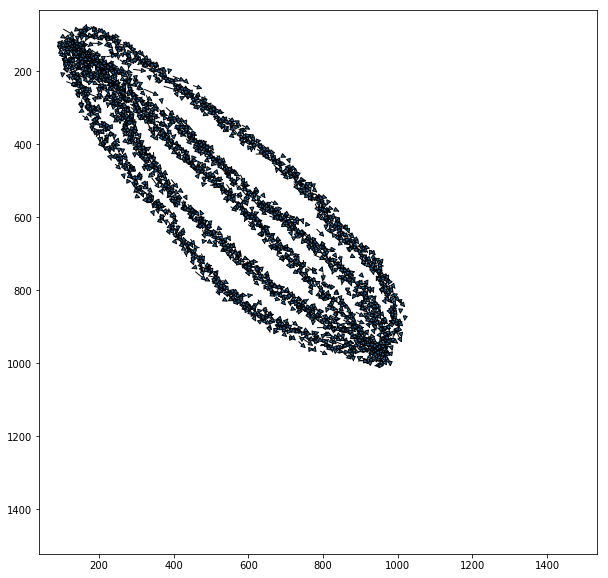

In [8]:
plot.plotTrack_mult(dataMat_org, dataMat_regPred, predShow ='false')

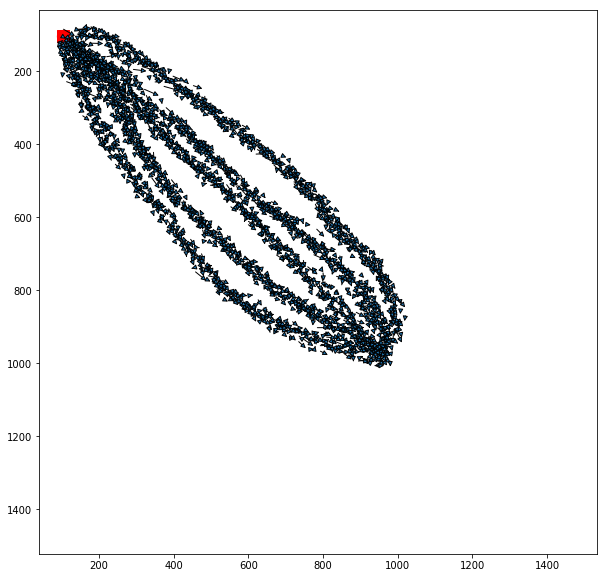

In [7]:
# test the Regression Tree !!
dataMat_regPred = reg.createForeCast(regTreeX_trained, dataMat_test, modelEval = reg.regTreeEval, stepPred='true', 
                                     treeX_trained=regTreeX_trained, treeY_trained=regTreeY_trained, numSteps=1)
plot.plotTrack_mult(dataMat_org, dataMat_regPred, predShow ='true')

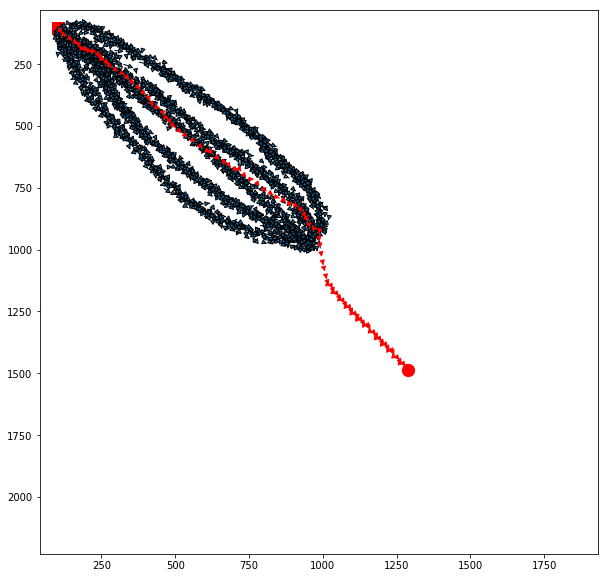

In [9]:
# test the Regression Tree !!
dataMat_regPred = reg.createForeCast(regTreeX_trained, dataMat_test, modelEval = reg.regTreeEval, stepPred='true', 
                                     treeX_trained=regTreeX_trained, treeY_trained=regTreeY_trained, numSteps=100)
plot.plotTrack_mult(dataMat_org, dataMat_regPred, predShow ='true')

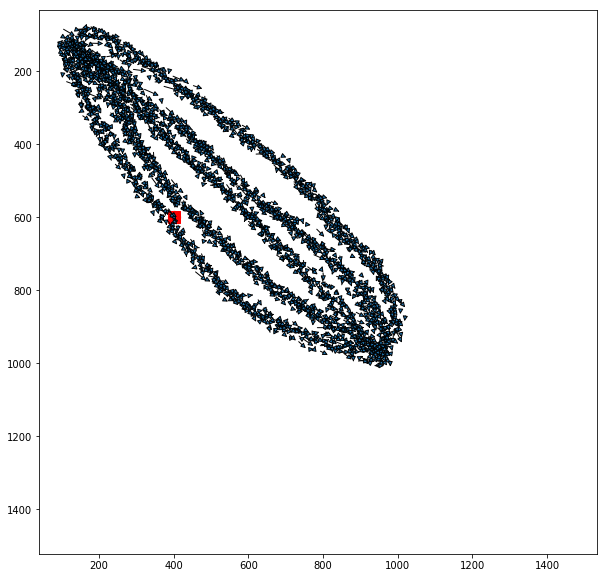

In [13]:
list_test = [400, 600, 0, 0]   # generate the temp. matrix for test
dataMat_test = np.mat(np.asarray(list_test))
dataMat_test
dataMat_regPred = reg.createForeCast(regTreeX_trained, dataMat_test, modelEval = reg.regTreeEval, stepPred='true', 
                                     treeX_trained=regTreeX_trained, treeY_trained=regTreeY_trained, numSteps=1)
plot.plotTrack_mult(dataMat_org, dataMat_regPred, predShow ='true')

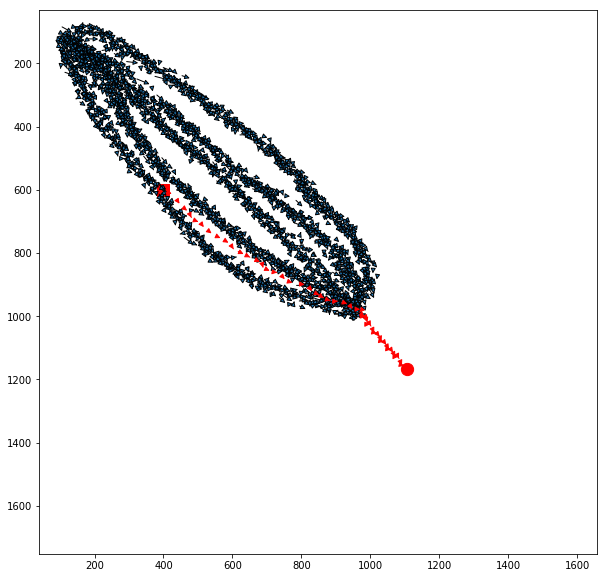

In [14]:
dataMat_regPred = reg.createForeCast(regTreeX_trained, dataMat_test, modelEval = reg.regTreeEval, stepPred='true', 
                                     treeX_trained=regTreeX_trained, treeY_trained=regTreeY_trained, numSteps=50)
plot.plotTrack_mult(dataMat_org, dataMat_regPred, predShow ='true')

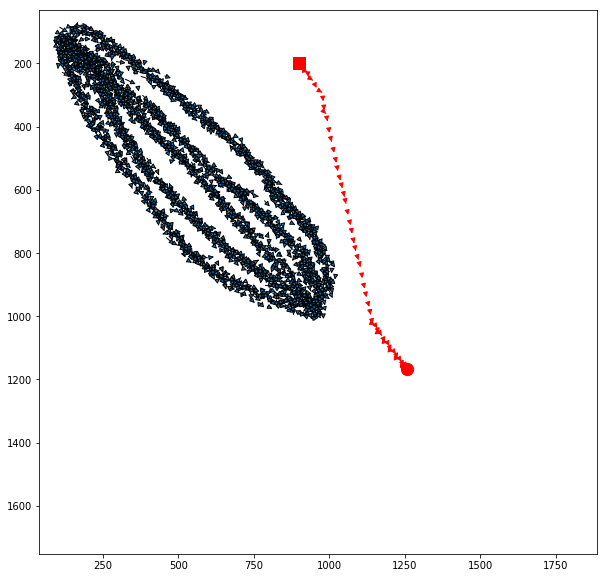

In [21]:
list_test = [900, 200, 0, 0]   # generate the temp. matrix for test
dataMat_test = np.mat(np.asarray(list_test))
dataMat_test
dataMat_regPred = reg.createForeCast(regTreeX_trained, dataMat_test, modelEval = reg.regTreeEval, stepPred='true', 
                                     treeX_trained=regTreeX_trained, treeY_trained=regTreeY_trained, numSteps=50)
plot.plotTrack_mult(dataMat_org, dataMat_regPred, predShow ='true')

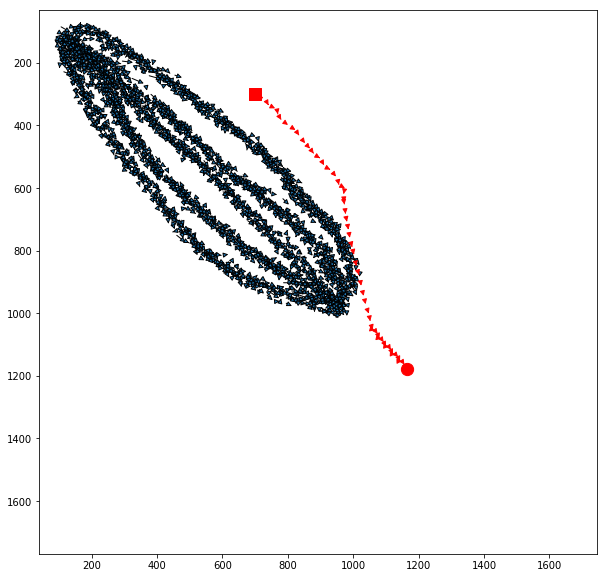

In [18]:
list_test = [700, 300, 0, 0]   # generate the temp. matrix for test
dataMat_test = np.mat(np.asarray(list_test))
dataMat_test
dataMat_regPred = reg.createForeCast(regTreeX_trained, dataMat_test, modelEval = reg.regTreeEval, stepPred='true', 
                                     treeX_trained=regTreeX_trained, treeY_trained=regTreeY_trained, numSteps=50)
plot.plotTrack_mult(dataMat_org, dataMat_regPred, predShow ='true')

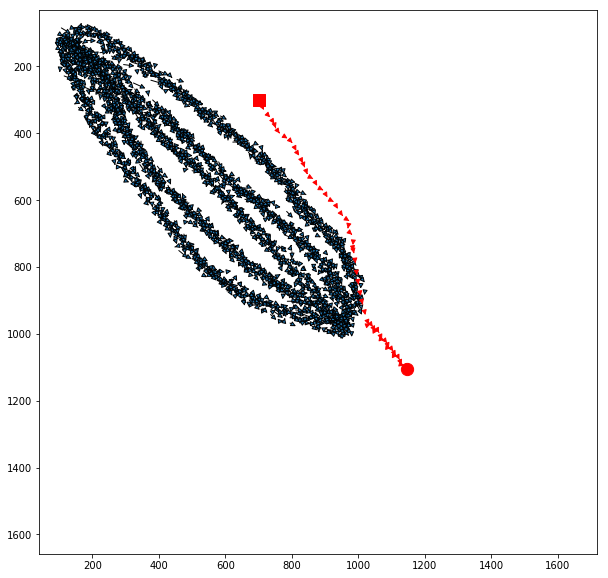

In [25]:
list_test = [700, 300, -20, -20]   # generate the temp. matrix for test
dataMat_test = np.mat(np.asarray(list_test))
dataMat_test
dataMat_regPred = reg.createForeCast(regTreeX_trained, dataMat_test, modelEval = reg.regTreeEval, stepPred='true', 
                                     treeX_trained=regTreeX_trained, treeY_trained=regTreeY_trained, numSteps=50)
plot.plotTrack_mult(dataMat_org, dataMat_regPred, predShow ='true')

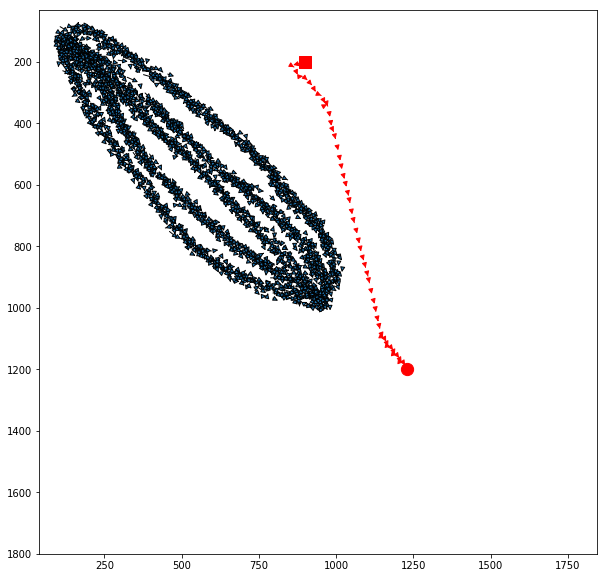

In [29]:
list_test = [900, 200, -100, -50]   # generate the temp. matrix for test
dataMat_test = np.mat(np.asarray(list_test))
dataMat_test
dataMat_regPred = reg.createForeCast(regTreeX_trained, dataMat_test, modelEval = reg.regTreeEval, stepPred='true', 
                                     treeX_trained=regTreeX_trained, treeY_trained=regTreeY_trained, numSteps=50)
plot.plotTrack_mult(dataMat_org, dataMat_regPred, predShow ='true')

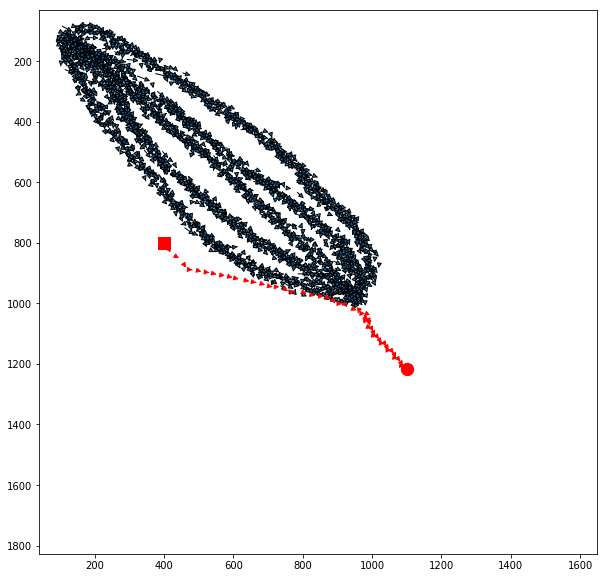

In [19]:
list_test = [400, 800, 0, 0]   # generate the temp. matrix for test
dataMat_test = np.mat(np.asarray(list_test))
dataMat_test
dataMat_regPred = reg.createForeCast(regTreeX_trained, dataMat_test, modelEval = reg.regTreeEval, stepPred='true', 
                                     treeX_trained=regTreeX_trained, treeY_trained=regTreeY_trained, numSteps=50)
plot.plotTrack_mult(dataMat_org, dataMat_regPred, predShow ='true')

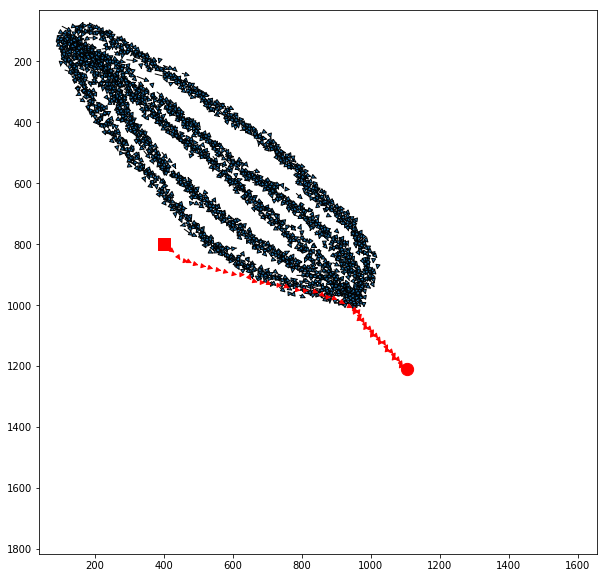

In [24]:
list_test = [400, 800, -10, -10]   # generate the temp. matrix for test
dataMat_test = np.mat(np.asarray(list_test))
dataMat_test
dataMat_regPred = reg.createForeCast(regTreeX_trained, dataMat_test, modelEval = reg.regTreeEval, stepPred='true', 
                                     treeX_trained=regTreeX_trained, treeY_trained=regTreeY_trained, numSteps=50)
plot.plotTrack_mult(dataMat_org, dataMat_regPred, predShow ='true')

In [ ]:
# test the Regression Tree !!
dataMat_regPred = reg.createForeCast(regTreeX_trained, dataMat_test, modelEval = reg.regTreeEval, stepPred='true', 
                                     treeX_trained=regTreeX_trained, treeY_trained=regTreeY_trained, numSteps=50)
plot.plotTrack_mult(dataMat_org, dataMat_regPred, predShow ='true')

In [ ]:
# test the Model Tree !!
dataMat_ModPred = reg.createForeCast(modTreeX_trained, dataMat_test, modelEval = reg.regTreeEval, stepPred='true', 
                                     treeX_trained=modTreeX_trained, treeY_trained=modTreeY_trained, numSteps=10)
plot.plotTrack_mult(dataMat_org, dataMat_ModPred, predShow ='true')

## Test 02: test point is the middle point of training data

In [10]:
dataMat_test = dataMat_org[math.ceil(len(dataMat_org)/2),0:4]    # make the starting point as test data
dataMat_test[:,2:] = 0
dataMat_test

matrix([[598.69365345, 390.65311497,   0.        ,   0.        ]])

In [ ]:
# test the Regression Tree !!
dataMat_regPred = reg.createForeCast(regTreeX_trained, dataMat_test, modelEval = reg.regTreeEval, stepPred='true', 
                                     treeX_trained=regTreeX_trained, treeY_trained=regTreeY_trained, numSteps=50)
plot.plotTrack_mult(dataMat_org, dataMat_regPred, predShow ='true')

### Test 02: test  point is on the left side

In [ ]:
list_test = [550, 600, 0, 0]   # generate the temp. matrix for test
dataMat_test = np.mat(np.asarray(list_test))
dataMat_test

In [ ]:
# test the Regression Tree !!
dataMat_regPred = reg.createForeCast(regTreeX_trained, dataMat_test, modelEval = reg.regTreeEval, stepPred='true', 
                                     treeX_trained=regTreeX_trained, treeY_trained=regTreeY_trained, numSteps=50)
plot.plotTrack_mult(dataMat_org, dataMat_regPred, predShow ='true')

## Test 03: test point is on the right side

In [ ]:
list_test = [600, 200, 0, 0]   # generate the temp. matrix for test
dataMat_test = np.mat(np.asarray(list_test))
dataMat_test

In [ ]:
# test the Regression Tree !!
dataMat_regPred = reg.createForeCast(regTreeX_trained, dataMat_test, modelEval = reg.regTreeEval, stepPred='true', 
                                     treeX_trained=regTreeX_trained, treeY_trained=regTreeY_trained, numSteps=50)
plot.plotTrack_mult(dataMat_org, dataMat_regPred, predShow ='true')

In [ ]:
list_test = [200, 800, 0, 0]   # generate the temp. matrix for test
dataMat_test = np.mat(np.asarray(list_test))
dataMat_test

In [ ]:
# test the Regression Tree !!
dataMat_regPred = reg.createForeCast(regTreeX_trained, dataMat_test, modelEval = reg.regTreeEval, stepPred='true', 
                                     treeX_trained=regTreeX_trained, treeY_trained=regTreeY_trained, numSteps=50)
plot.plotTrack_mult(dataMat_org, dataMat_regPred, predShow ='true')

In [ ]:
## test the result!!

liste = [5.00002203e+02, 6.00021566e+02, 1.47052109e-03, 1.43733376e-02]   # generate the temp. matrix for test
data_mat = np.mat(np.asarray(liste))
accX = treeForecast(modTreeX_trained, data_mat, modelTreeEval)   # test the accX_pred
accY = treeForecast(modTreeY_trained, data_mat, modelTreeEval)   # test the accX_pred
print("accX = {}, accY = {}".format(accX, accY))

In [ ]:
accRegArr_x = reg.createForeCast(regTreeX_trained, testMat)    #  dataMat_x[:,:-1]: transfer all feature data, Except the acceleration !
accRegArr_Y = reg.createForeCast(regTreeY_trained, testMat) 
print("accRegArr_x = {} and accRegArr_Y = {}".format(accRegArr_x, accRegArr_Y))

In [ ]:
accModArr_x = reg.createForeCast(modTreeX_trained, testMat, modelEval = reg.modelTreeEval)    #  dataMat_x[:,:-1]: transfer all feature data, Except the acceleration !
accModArr_Y = reg.createForeCast(modTreeY_trained, testMat, modelEval = reg.modelTreeEval) 
print("accModArr_x = {} and accModArr_Y = {}".format(accModArr_x, accModArr_Y))

In [ ]:
dataMat_org = np.mat([0,0,0,0,0,0])
dataMat_org

In [ ]:
ar = [1,2,3,4]; br = [11,22,33,44]
aa = np.asarray(ar); bb = np.asarray(br)

In [ ]:
aaMat = np.mat(ar); bbMat = np.mat(br)
aaMat

In [ ]:
bbMat

In [ ]:
np.row_stack((aaMat, bbMat))  

In [ ]:
np.column_stack((aaMat, bbMat))  

In [ ]:
dataMat_org[len(dataMat_org)-1,0:4]

In [ ]:
math.ceil(5/2)

In [ ]:
np.abs(-1)

In [ ]:
xx = [1,2,3,66,88]

In [ ]:
(xx[4]-xx[3]<23)

In [ ]:
t = (1,2)
t

In [ ]:
t.dtype()